In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [33]:
df=pd.DataFrame(data=d)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   miles_per_week       101 non-null    int64 
 1   completed_50m_ultra  101 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [34]:
print(df.isnull().sum())
print(df.head())

miles_per_week         0
completed_50m_ultra    0
dtype: int64
   miles_per_week completed_50m_ultra
0              37                  no
1              39                  no
2              46                  no
3              51                  no
4              88                  no


In [35]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()
# enc.fit(df[['completed_50m_ultra']])
# df[['completed_50m_ultra']]=enc.transform(df[['completed_50m_ultra']])
df[['completed_50m_ultra']]=enc.fit_transform(df[['completed_50m_ultra']])
print(df.head())
print(df.tail())

   miles_per_week  completed_50m_ultra
0              37                  0.0
1              39                  0.0
2              46                  0.0
3              51                  0.0
4              88                  0.0
     miles_per_week  completed_50m_ultra
96               67                  1.0
97               74                  1.0
98               79                  1.0
99               90                  1.0
100             112                  1.0


Text(0.5, 1.0, 'Logistic Regression')

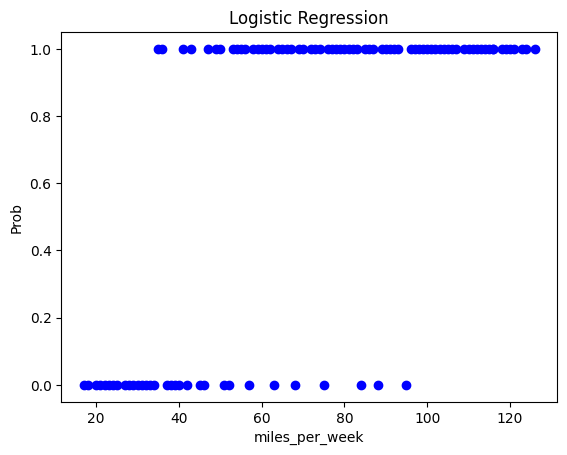

In [39]:
plt.scatter(df.miles_per_week,df.completed_50m_ultra,color="blue",marker='o')
plt.xlabel("miles_per_week")
plt.ylabel("Prob")
plt.title("Logistic Regression")

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

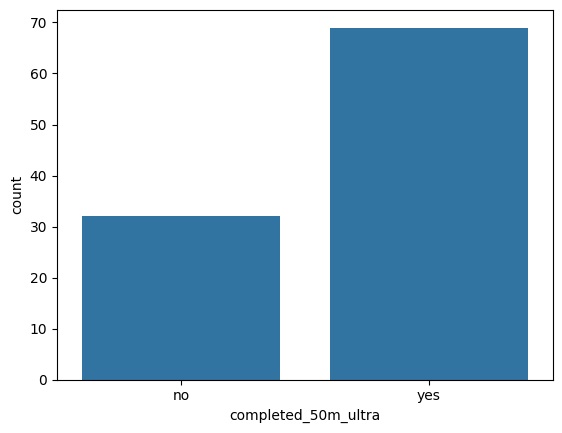

In [47]:
sns.countplot(x='completed_50m_ultra',data=d)

In [53]:
#This mean iloc[row wise, coln wise]
X=df.iloc[:,0:1]
y=df.iloc[:,1]
print(X)
print(y)

     miles_per_week
0                37
1                39
2                46
3                51
4                88
..              ...
96               67
97               74
98               79
99               90
100             112

[101 rows x 1 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
Name: completed_50m_ultra, Length: 101, dtype: float64


In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=11)

In [57]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
y_pred=model.predict(X_test)

In [59]:
model.score(X_test,y_test)

0.9047619047619048

In [61]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[ 5  1]
 [ 1 14]]


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

